In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statistics

In [243]:
# loading datasets
df_hyundai = pd.read_csv('hyundai.csv')
df_merc = pd.read_csv('merc.csv')

In [244]:
df_hyundai.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [245]:
df_merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [246]:
print("describe for hyundai:\n", df_hyundai.describe(), "\n")
print("describe for mercedes:\n", df_merc.describe())

describe for hyundai:
               year        price        mileage       tax(£)          mpg  \
count  4860.000000   4860.00000    4860.000000  4860.000000  4860.000000   
mean   2017.107613  12750.13107   21486.049588   121.147119    53.827798   
std       1.920456   5992.92231   17710.196964    58.003289    12.736042   
min    2000.000000   1200.00000       1.000000     0.000000     1.100000   
25%    2016.000000   8000.00000    8339.250000   125.000000    44.800000   
50%    2017.000000  11990.00000   17462.000000   145.000000    55.400000   
75%    2019.000000  15733.75000   30967.000000   145.000000    60.100000   
max    2020.000000  92000.00000  138000.000000   555.000000   256.800000   

        engineSize  
count  4860.000000  
mean      1.457922  
std       0.400788  
min       0.000000  
25%       1.200000  
50%       1.600000  
75%       1.700000  
max       2.900000   

describe for mercedes:
                year          price        mileage           tax           mpg

In [247]:
print("model for mercedes:\n", df_merc["model"].value_counts(), "\n")
print("model for hyundai:\n", df_hyundai["model"].value_counts())

model for mercedes:
 model
 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
230              1
220              1
200              1
Name: count, dtype: int64 

model for hyundai:
 model
Tucson      1300
I10         1092
I30          536
I20          496
Kona         328
Ioniq        284
Santa Fe     245
IX20         204
I40          127
IX35         118
I800         117
Getz           6
Veloster       3
Terracan       2
Accent         1
Amica          1
Name: count, dtype: int64


In [248]:
print("types for hyundai:\n", df_hyundai.dtypes, "\n")
print("types for mercedes:\n", df_merc.dtypes)

types for hyundai:
 model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object 

types for mercedes:
 model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [249]:
df_hyundai.rename(columns={"tax(£)" : "tax"}, inplace = True)

In [250]:
print("NaN values for hyundai:\n", df_hyundai.isnull().sum(), "\n")
print("NaN values for mercedes:\n", df_merc.isnull().sum(), "\n")

NaN values for hyundai:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64 

NaN values for mercedes:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64 



In [251]:
df_hyundai["brand"] = "Hyundai"
df_merc["brand"] = "Mercedes"
df_cars = pd.concat([df_hyundai, df_merc], ignore_index = True)

In [252]:
df_cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,17979.000000,17979.000000,17979.000000,17979.000000,17979.000000,17979.000000
mean,2017.245286,21468.742978,21824.265310,127.586629,54.796852,1.905662
std,2.148305,11840.767074,20298.541747,63.500107,14.601949,0.597308
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,13999.000000,6745.500000,125.000000,45.600000,1.500000
50%,2017.000000,19490.000000,15935.000000,145.000000,56.500000,2.000000
75%,2019.000000,26144.500000,31479.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,256.800000,6.200000


In [253]:
df_cars['age'] = 2025 - df_cars['year']
df_cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,age
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundai,8
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundai,9
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundai,9
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundai,9
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundai,10


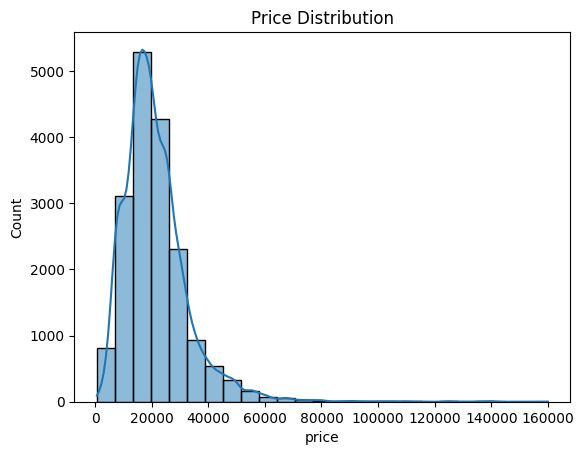

In [254]:
# Distribution of price
sns.histplot(df_cars['price'], bins=25, kde=True)
plt.title("Price Distribution")
plt.show()

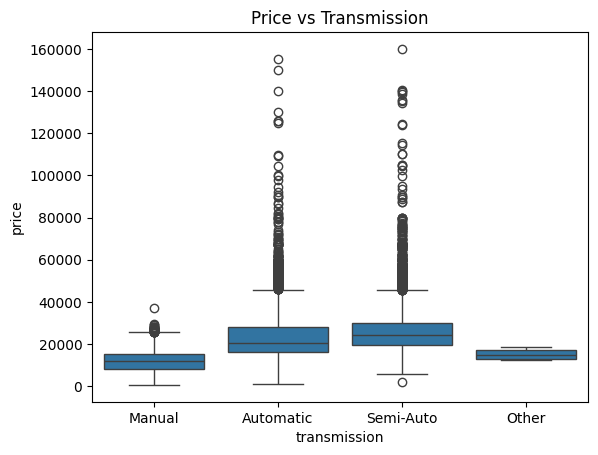

In [255]:
# Boxplot - Price by transmission
sns.boxplot(x='transmission', y='price', data=df_cars)
plt.title("Price vs Transmission")
plt.show()

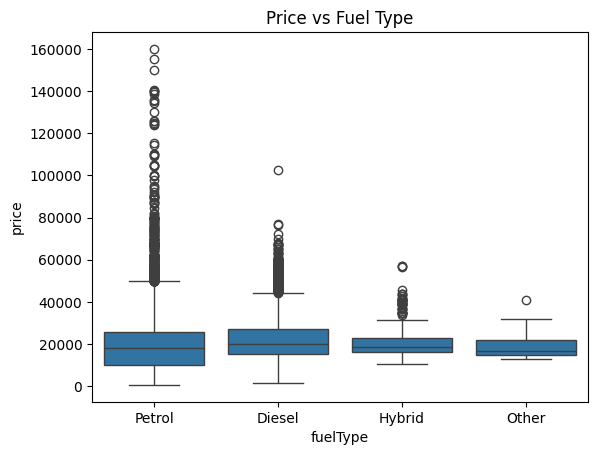

In [256]:
# Boxplot - Price by fuel type
sns.boxplot(x='fuelType', y='price', data=df_cars)
plt.title("Price vs Fuel Type")
plt.show()

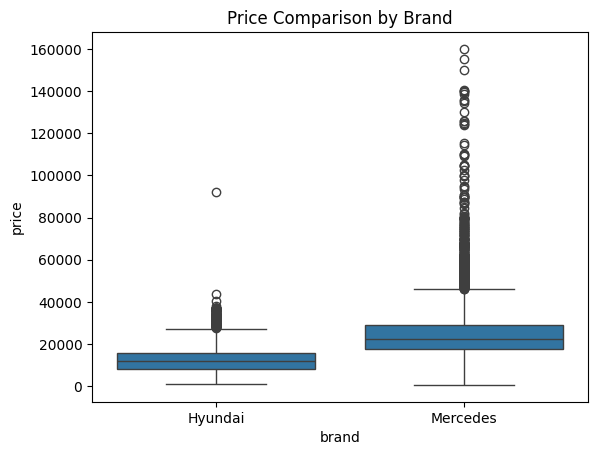

In [257]:
# Boxplot - Price by brand
sns.boxplot(x='brand', y='price', data=df_cars)
plt.title("Price Comparison by Brand")
plt.show()

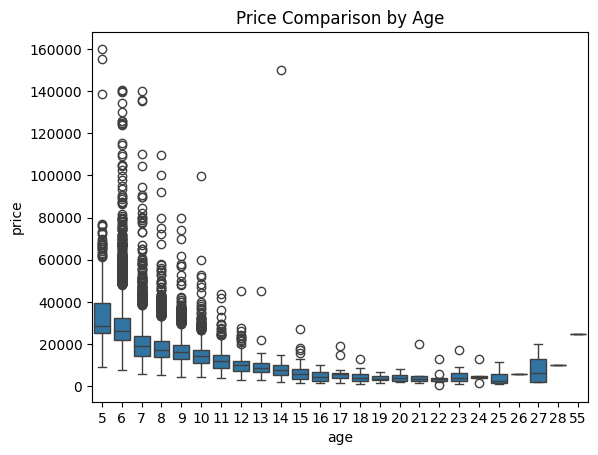

In [258]:
# Boxplot - Price by age
sns.boxplot(x='age', y='price', data=df_cars)
plt.title("Price Comparison by Age")
plt.show()

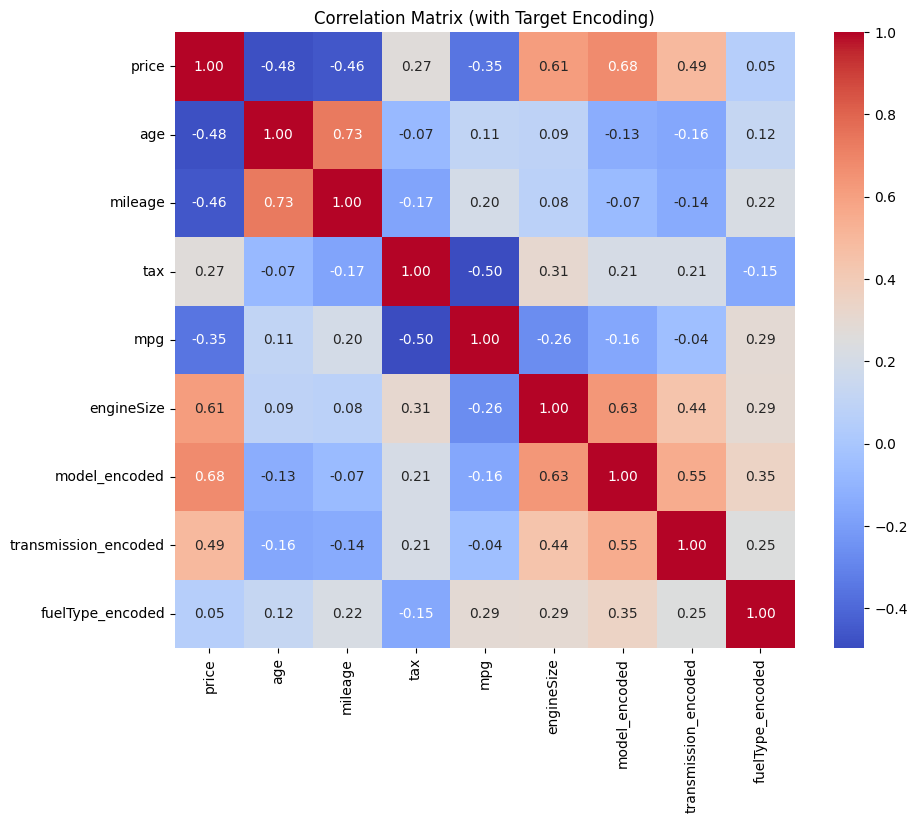

In [259]:
# target encoding converts each category to price average → becomes numeric,
# enters directly into the correlation matrix.
df_eda = df_cars.copy()
df_eda["model_encoded"] = df_eda.groupby("model")["price"].transform("mean")
df_eda["transmission_encoded"] = df_eda.groupby("transmission")["price"].transform("mean")
df_eda["fuelType_encoded"] = df_eda.groupby("fuelType")["price"].transform("mean")

# use columns that contain numeric data for correlation matrix
corr_columns = ["price", "age", "mileage", "tax", "mpg", "engineSize",
                "model_encoded", "transmission_encoded", "fuelType_encoded"]
correlation_matrix = df_eda[corr_columns].corr()

# visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (with Target Encoding)")
plt.show()

---
HYPOTHESIS TESTS


In [260]:
# Does transmission type affect average price?
auto_prices = df_cars[df_cars['transmission'] == 'Automatic']['price']
manual_prices = df_cars[df_cars['transmission'] == 'Manual']['price']

# T-test
t_stat, p_value = stats.ttest_ind(auto_prices, manual_prices, equal_var=False)
print("T-test Results: Transmission vs Price")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between automatic and manual cars (reject H0).")
else:
    print("There is no price difference between automatic and manual cars (fail to reject H0).")


T-test Results: Transmission vs Price
t-statistic: 62.12, p-value: 0.0
There is a price difference between automatic and manual cars (reject H0).


In [261]:
# Does fuel type affect average price?
petrol_prices = df_cars[df_cars['fuelType'] == 'Petrol']['price']
diesel_prices = df_cars[df_cars['fuelType'] == 'Diesel']['price']

# T-test
t_stat, p_value = stats.ttest_ind(petrol_prices, diesel_prices, equal_var=False)
print("T-test Results: Fuel Type vs Price")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between petrol and diesel cars (reject H0).")
else:
    print("There is no price difference between petrol and diesel cars (fail to reject H0).")

T-test Results: Fuel Type vs Price
t-statistic: -6.17, p-value: 6.882688816088018e-10
There is a price difference between petrol and diesel cars (reject H0).


In [262]:
# Does brand affect average price?
merc_prices = df_cars[df_cars['brand'] == 'Mercedes']['price']
hyundai_prices = df_cars[df_cars['brand'] == 'Hyundai']['price']

# T-test
t_stat, p_value = stats.ttest_ind(merc_prices, hyundai_prices, equal_var=False)
print("T-test Results: Brand vs Price")
print(f"t-statistic: {t_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between hyundai and mercedes cars (reject H0).")
else:
    print("There is no price difference between hyundai and mercedes cars (fail to reject H0).")

T-test Results: Brand vs Price
t-statistic: 88.86021429153533, p-value: 0.0
There is a price difference between hyundai and mercedes cars (reject H0).


In [263]:
new_cars = df_cars[df_cars['year'] >= 2020]['price']
old_cars = df_cars[df_cars['year'] < 2020]['price']

t_stat, p_value = stats.ttest_ind(new_cars, old_cars, equal_var=False)
print("T-test: New cars (>=2020) vs Old cars (<2020)")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between old and new cars (reject H0).")
else:
    print("There is no price difference between old and new cars (fail to reject H0).")

T-test: New cars (>=2020) vs Old cars (<2020)
t-statistic: 24.43, p-value: 2.128803126157875e-102
There is a price difference between old and new cars (reject H0).


In [264]:
low_mileage = df_cars[df_cars['mileage'] < 20000]['price']
high_mileage = df_cars[df_cars['mileage'] >= 20000]['price']

t_stat, p_value = stats.ttest_ind(low_mileage, high_mileage, equal_var=False)
print("T-test: Low mileage (<20k) vs High mileage (>=20k)")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between low and high mileage cars (reject H0).")
else:
    print("There is no price difference between low and high mileage cars (fail to reject H0).")

T-test: Low mileage (<20k) vs High mileage (>=20k)
t-statistic: 66.14, p-value: 0.0
There is a price difference between low and high mileage cars (reject H0).


In [265]:
high_mpg = df_cars[df_cars['mpg'] >= 50]['price']
low_mpg = df_cars[df_cars['mpg'] < 50]['price']

t_stat, p_value = stats.ttest_ind(high_mpg, low_mpg, equal_var=False)
print("T-test: High mpg (>=50) vs Low mpg (<50)")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between low and high mpg cars (reject H0).")
else:
    print("There is no price difference between low and high mpg cars (fail to reject H0).")

T-test: High mpg (>=50) vs Low mpg (<50)
t-statistic: -46.28, p-value: 0.0
There is a price difference between low and high mpg cars (reject H0).


In [266]:
large_engine = df_cars[df_cars['engineSize'] >= 2.0]['price']
small_engine = df_cars[df_cars['engineSize'] < 2.0]['price']

t_stat, p_value = stats.ttest_ind(large_engine, small_engine, equal_var=False)
print("T-test: Large engine (>=2.0L) vs Small engine (<2.0L)")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between small and large engine size cars (reject H0).")
else:
    print("There is no price difference between small and large engine size cars (fail to reject H0).")

T-test: Large engine (>=2.0L) vs Small engine (<2.0L)
t-statistic: 72.37, p-value: 0.0
There is a price difference between small and large engine size cars (reject H0).


---
PREDICTION & LINEAR REGRESSION

In [267]:
cars = df_cars.copy()
cars.head(-1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,age
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundai,8
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundai,9
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundai,9
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundai,9
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundai,10
...,...,...,...,...,...,...,...,...,...,...,...
17973,C Class,2020,30999,Automatic,1000,Diesel,145,64.2,2.0,Mercedes,5
17974,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0,Mercedes,5
17975,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0,Mercedes,5
17976,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1,Mercedes,6


In [268]:
print(cars['model'].value_counts())

model
 C Class      3747
 A Class      2561
 E Class      1953
 Tucson       1300
 I10          1092
 GLC Class     960
 GLA Class     847
 B Class       591
 I30           536
 CL Class      511
 I20           496
 GLE Class     461
 Kona          328
 Ioniq         284
 SL CLASS      260
 Santa Fe      245
 CLS Class     237
 V Class       207
 IX20          204
 S Class       197
 I40           127
 GL Class      121
 IX35          118
 I800          117
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 Getz            6
 Veloster        3
 CLC Class       3
 Terracan        2
 R Class         2
 Accent          1
 Amica           1
180              1
230              1
220              1
200              1
Name: count, dtype: int64


In [269]:
cars['transmission'].value_counts()

,count
transmission,
Semi-Auto,7426
Automatic,5494
Manual,5055
Other,4


In [270]:
cars['fuelType'].value_counts()

,count
fuelType,
Diesel,10795
Petrol,6654
Hybrid,522
Other,8


In [271]:
cars['model'] = cars['brand'] + ' ' + cars['model']
cars.drop('brand', axis=1, inplace=True)
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,Hyundai I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,8
1,Hyundai Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,9
2,Hyundai Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,9
3,Hyundai I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,9
4,Hyundai IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,10


In [272]:
# In "model" column, removes models that seen less than 196 times
model_counts = cars['model'].value_counts()
frequent_models = model_counts[model_counts >= 196].index   # 196 since I want to include S Class
cars = cars[cars['model'].isin(frequent_models)]

# removes "other" in transmission
cars = cars[cars['transmission'] != 'Other']

# removes "other" in fuel type
cars = cars[cars['fuelType'] != 'Other']
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,Hyundai I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,8
1,Hyundai Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,9
2,Hyundai Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,9
3,Hyundai I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,9
5,Hyundai I10,2015,6149,Manual,41650,Petrol,20,60.1,1.0,10


In [273]:
cars['model'].value_counts()

,count
model,
Mercedes C Class,3742
Mercedes A Class,2561
Mercedes E Class,1953
Hyundai Tucson,1299
Hyundai I10,1092
Mercedes GLC Class,960
Mercedes GLA Class,846
Mercedes B Class,591
Hyundai I30,536


In [274]:
cars[['price', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'age']].describe()

,price,mileage,mpg,engineSize,age
count,17007.000000,17007.000000,17007.000000,17007.000000,17007.000000
mean,21545.080614,21039.630505,55.277115,1.887640,7.651908
std,11525.408762,19632.978886,14.419825,0.589627,1.947918
min,650.000000,1.000000,1.100000,0.000000,5.000000
25%,14230.500000,6466.000000,46.300000,1.500000,6.000000
50%,19695.000000,15275.000000,56.500000,2.000000,7.000000
75%,26199.000000,30292.500000,64.200000,2.100000,9.000000
max,149948.000000,259000.000000,256.800000,6.200000,28.000000


In [275]:
cars = cars[cars['engineSize'] != 0]    # A car can not have 0.0 engine size
cars = cars[(cars['price'] >= 1000) & (cars['price'] <= 100000)]     # I will not consider luxury cars
cars[['price', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'age']].describe()

,price,mileage,mpg,engineSize,age
count,16935.000000,16935.000000,16935.000000,16935.000000,16935.000000
mean,21447.807735,21053.148096,55.306708,1.890257,7.650487
std,10958.916726,19640.330431,14.398717,0.576346,1.945554
min,1200.000000,1.000000,1.100000,1.000000,5.000000
25%,14270.000000,6498.000000,46.300000,1.500000,6.000000
50%,19699.000000,15274.000000,56.500000,2.000000,7.000000
75%,26199.000000,30308.000000,64.200000,2.100000,9.000000
max,99950.000000,259000.000000,256.800000,6.200000,28.000000


In [276]:
predictors_cars0 = ['engineSize']
outcome_cars0 = 'price'
cars0 = LinearRegression()
cars0.fit(cars[predictors_cars0], cars[outcome_cars0])

print(f'Intercept: {cars0.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors_cars0, cars0.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: -1057.060
Coefficients:
 engineSize: 11905.719


In [277]:
# price for a car with minimum engine size which is 1.0
cars0.coef_[0] * cars['engineSize'].min() + cars0.intercept_

np.float64(10848.65951902299)

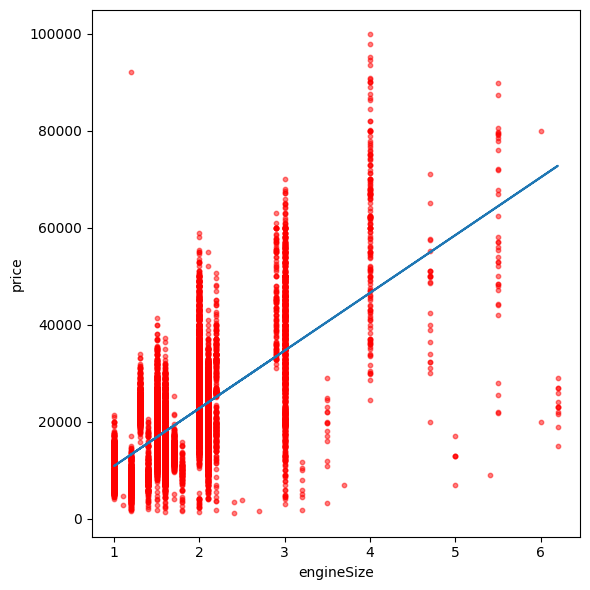

In [278]:
fitted_cars0 = cars0.predict(cars[predictors_cars0])
residuals_cars0 = cars[outcome_cars0] - fitted_cars0

ax = cars.plot.scatter(x = 'engineSize', y = 'price', figsize = (6, 6), color = "red", alpha = 0.5, s = 10)
ax.plot(cars['engineSize'], fitted_cars0)

plt.tight_layout()
plt.show()

In [279]:
# Build a simple linear regression model using engineSize2 (centered engineSize) as the predictor and price as the outcome variable
cars['engineSize2'] = cars['engineSize'] - min(cars['engineSize'])
predictors_cars1 = ['engineSize2']
outcome_cars1 = 'price'

cars_lm1 = LinearRegression()
cars_lm1.fit(cars[predictors_cars1], cars[outcome_cars1])

print(f'Intercept: {cars_lm1.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors_cars1, cars_lm1.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: 10848.660
Coefficients:
 engineSize2: 11905.719


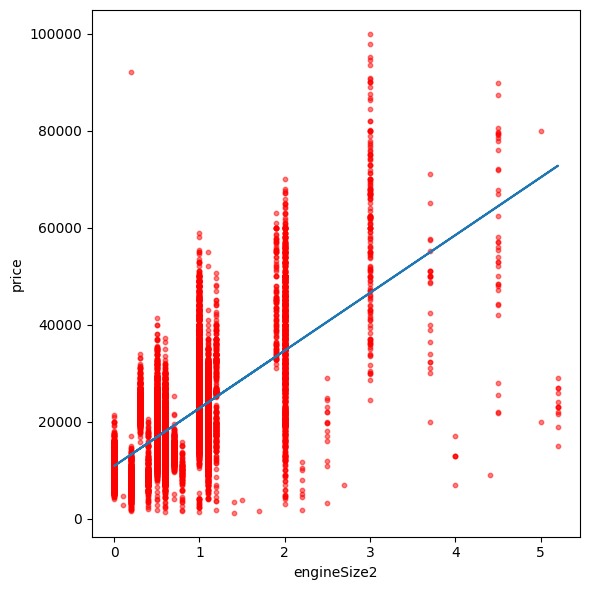

In [280]:
fitted_cars1 = cars_lm1.predict(cars[predictors_cars1])
residuals_cars1 = cars[outcome_cars1] - fitted_cars1

ax = cars.plot.scatter(x = 'engineSize2', y = 'price', figsize = (6, 6), color = "red", alpha = 0.5, s = 10)
ax.plot(cars['engineSize2'], fitted_cars1)

plt.tight_layout()
plt.show()

In [281]:
predictors_cars = ['mileage', 'mpg', 'engineSize', 'age']  # I did not use categorical ones like model, transmission type, fuel type
outcome_cars = 'price'

cars_lm = LinearRegression()
cars_lm.fit(cars[predictors_cars], cars[outcome_cars])

print(f'Intercept: {cars_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors_cars, cars_lm.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: 22732.440
Coefficients:
 mileage: -0.096
 mpg: -73.539
 engineSize: 12501.266
 age: -2462.114


---
CORRELATED PREDICTORS

In [282]:
predictors_correlated = ['mileage', 'mpg', 'engineSize', 'age']
outcome_correlated = 'price'

cars_lm_correlated = LinearRegression()
cars_lm_correlated.fit(cars[predictors_correlated], cars[outcome_correlated])

print(f'Intercept: {cars_lm_correlated.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors_correlated, cars_lm_correlated.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: 22732.440
Coefficients:
 mileage: -0.096
 mpg: -73.539
 engineSize: 12501.266
 age: -2462.114


In [283]:
cars[['price', 'mileage', 'mpg', 'engineSize', 'age']].corr().round(2)

,price,mileage,mpg,engineSize,age
price,1.00,-0.47,-0.36,0.63,-0.52
mileage,-0.47,1.00,0.24,0.08,0.74
mpg,-0.36,0.24,1.00,-0.23,0.17
engineSize,0.63,0.08,-0.23,1.00,0.09
age,-0.52,0.74,0.17,0.09,1.00


---
CROSS-VALIDATION

In [284]:
outcome_cv = 'price'

df = cars.loc[0:1000, :]

def evaluate_model(predictor_list):
    X = df[predictor_list].values
    y = df[outcome_cv]
    model = LinearRegression()
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv = kfold, scoring='neg_mean_squared_error')
    rmse = statistics.mean(np.sqrt(np.abs(scores)))
    print(f'{predictor_list} → RMSE: {rmse:.2f}')

evaluate_model(['mileage', 'engineSize', 'age', 'mpg'])
evaluate_model(['mileage', 'engineSize', 'age'])
evaluate_model(['mpg', 'engineSize', 'age'])
evaluate_model(['mpg', 'mileage', 'engineSize'])
evaluate_model(['mpg', 'engineSize'])
evaluate_model(['age', 'mileage'])
evaluate_model(['mpg', 'age'])
evaluate_model(['engineSize'])

# I'll use mileage, engineSize, age and mpg as predictors since they have the lowest RMSE

['mileage', 'engineSize', 'age', 'mpg'] → RMSE: 2207.69
['mileage', 'engineSize', 'age'] → RMSE: 2259.97
['mpg', 'engineSize', 'age'] → RMSE: 2301.96
['mpg', 'mileage', 'engineSize'] → RMSE: 2780.17
['mpg', 'engineSize'] → RMSE: 3495.79
['age', 'mileage'] → RMSE: 3711.86
['mpg', 'age'] → RMSE: 3647.44
['engineSize'] → RMSE: 3762.83


---
APPLYING LINEAR REGRESSION

In [285]:
predictors_ = ['model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'age']
outcome_cars1 = 'price'
X = pd.get_dummies(cars[predictors_], drop_first = True)

cars_lm_ = LinearRegression()
cars_lm_.fit(X, cars[outcome_cars1])
print(f'Intercept: {cars_lm_.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, cars_lm_.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: 21184.282
Coefficients:
 mileage: -0.104
 mpg: -77.620
 engineSize: 8197.962
 age: -2012.475
 model_Hyundai  I20: 752.833
 model_Hyundai  I30: 2393.490
 model_Hyundai  IX20: -903.464
 model_Hyundai  Ioniq: -1218.975
 model_Hyundai  Kona: 2381.057
 model_Hyundai  Santa Fe: 6385.707
 model_Hyundai  Tucson: 2305.431
 model_Mercedes  A Class: 6332.587
 model_Mercedes  B Class: 4539.776
 model_Mercedes  C Class: 7046.953
 model_Mercedes  CL Class: 6564.320
 model_Mercedes  CLS Class: 7201.614
 model_Mercedes  E Class: 8158.977
 model_Mercedes  GLA Class: 5039.068
 model_Mercedes  GLC Class: 12467.466
 model_Mercedes  GLE Class: 15838.831
 model_Mercedes  S Class: 17830.618
 model_Mercedes  SL CLASS: 8183.748
 model_Mercedes  V Class: 13390.234
 transmission_Manual: -1470.316
 transmission_Semi-Auto: 236.840
 fuelType_Hybrid: 6040.120
 fuelType_Petrol: 1590.036


In [286]:
# For Linear Regression
# Cross-validation
k2fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv2_scores = cross_val_score(cars_lm_, X, cars[outcome_cars1], cv = k2fold, scoring='neg_mean_squared_error')

rmse_scores = statistics.mean(np.sqrt(np.abs(cv2_scores)))

print(f"RMSE: {rmse_scores.mean():.2f} (±{rmse_scores.std():.2f})")

# Train-test split evaluation
X_train, X_test, y_train, y_test = train_test_split(X, cars[outcome_cars], test_size=0.2)
cars_lm_.fit(X_train, y_train)
y_pred = cars_lm_.predict(X_test)
y_pred = np.maximum(0, y_pred)
print(f"Test R²: {r2_score(y_test, y_pred):.2f}")

# INTERPRETATION
# Model's predictions are typically ±£4501 away from actual prices

# My linear regression model explains approximately 85% of the variability in car prices based on the included predictors

RMSE: 4501.56 (±0.00)
Test R²: 0.84


In [287]:
X = pd.get_dummies(cars[predictors_], drop_first=True)
y = cars[outcome_cars1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Decision Tree ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"\nDecision Tree R²: {r2_dt:.4f}")

# --- Random Forest ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R²: {r2_rf:.4f}")

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R²: {r2_lr:.4f}")


Decision Tree R²: 0.9417
Random Forest R²: 0.9607
Linear Regression R²: 0.8400


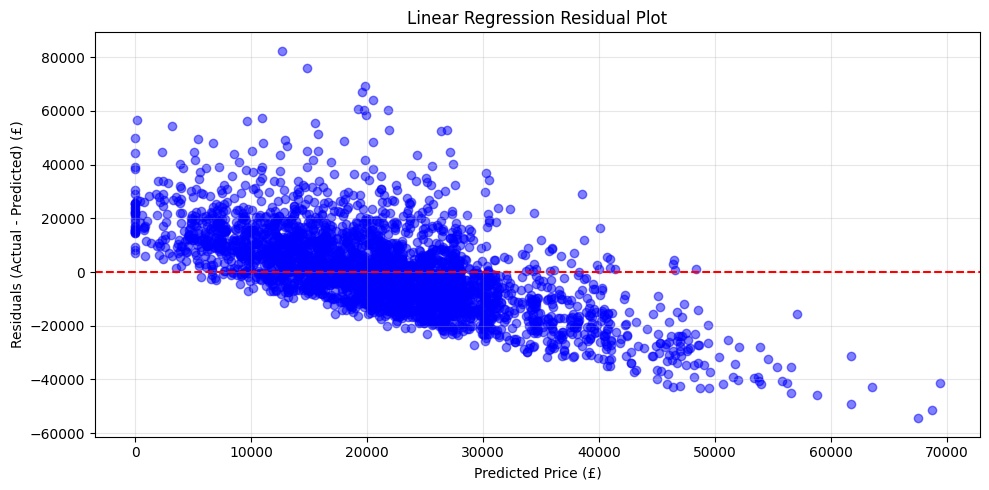

In [288]:
# Create basic residual plot
plt.figure(figsize=(10, 5))

residuals = y_test - y_pred
# Plot residuals vs predicted values
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)

# Add zero line
plt.axhline(y=0, color='red', linestyle='--')

# Label axes clearly
plt.xlabel("Predicted Price (£)")
plt.ylabel("Residuals (Actual - Predicted) (£)")
plt.title("Linear Regression Residual Plot")

# Show plot
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

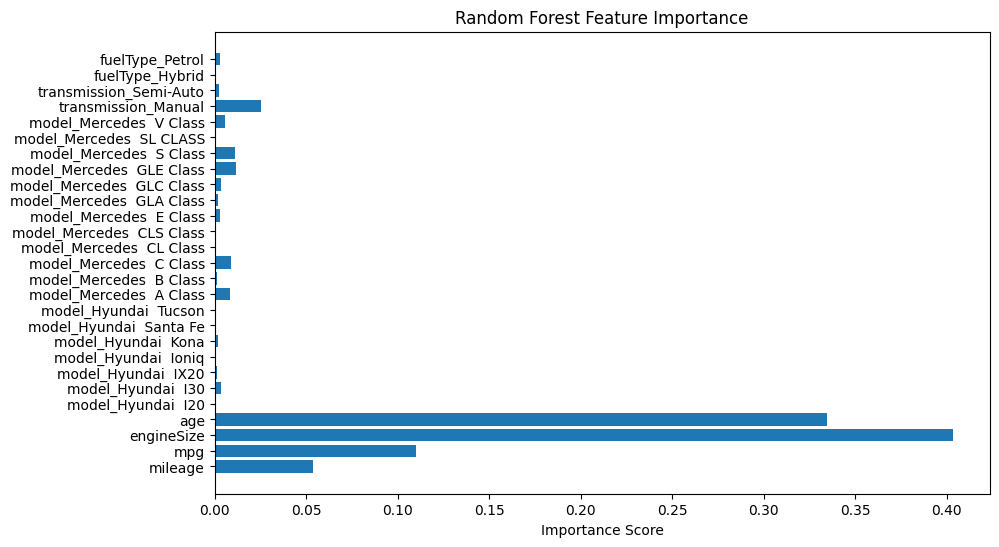

In [289]:
# For Random Forest model, this graph shows each feature's effect on price.
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.show()

CONCLUSION

When we look at the R square values of the Linear Regression, Random Forest and Decision Tree models, although the Random Forest model has the highest R square value, choosing the Linear Regression model can provide more understandability due to its simplicity and clarity among the models with similar and high accuracy rates.